In [47]:
pip install py-AutoClean

In [48]:
import pandas as pd
from AutoClean import AutoClean
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
data = pd.read_csv('/content/WalmartDataset.csv', encoding='latin-1')

In [50]:
cleaned_data = AutoClean(
    data,
    mode = 'manual',
    missing_num="auto",  # Impute missing numerical data
    missing_categ='auto',  # Impute missing categorical data
    outliers='auto',  # Detect and handle outliers
    duplicates = 'auto',
    extract_datetime = 's',
)

AutoClean process completed in 11.018939 seconds
Logfile saved to: /content/autoclean.log


In [51]:
df_cleaned = cleaned_data.output

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from AutoClean import AutoClean

# **discriptive data analysis**


# **Categorical graphs**

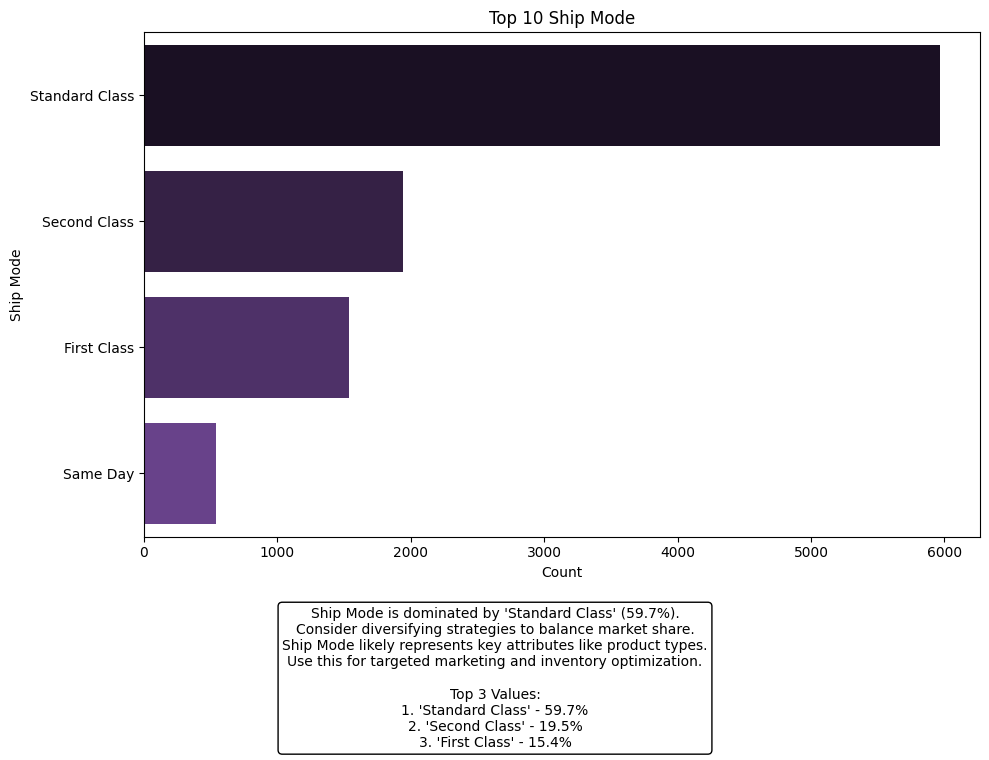

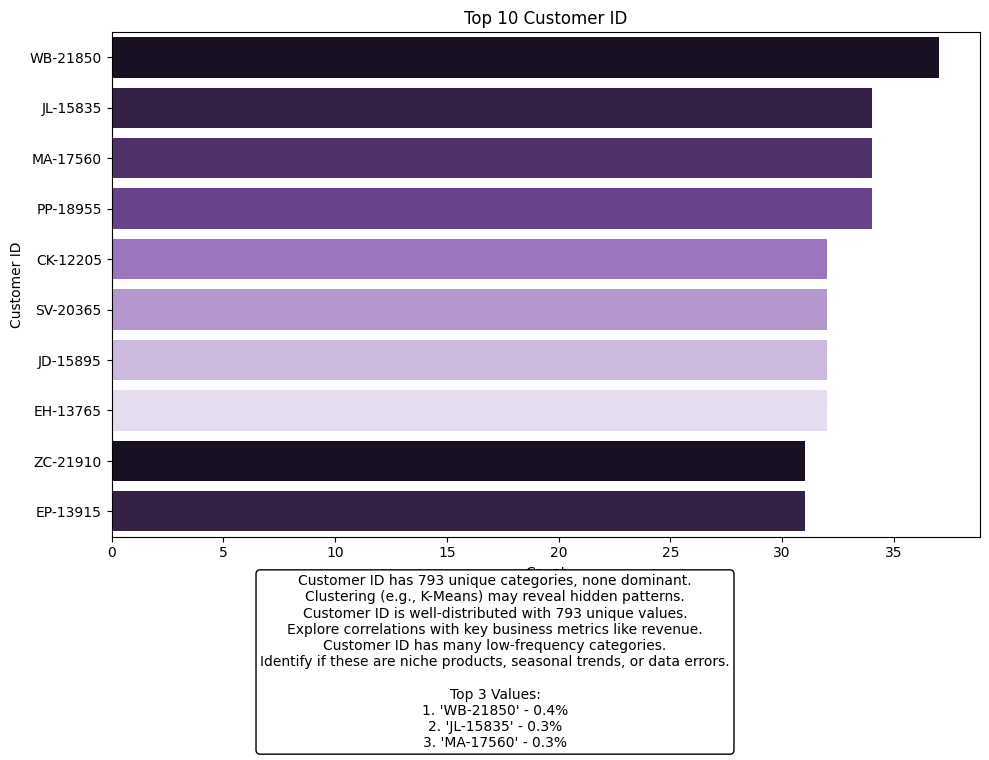

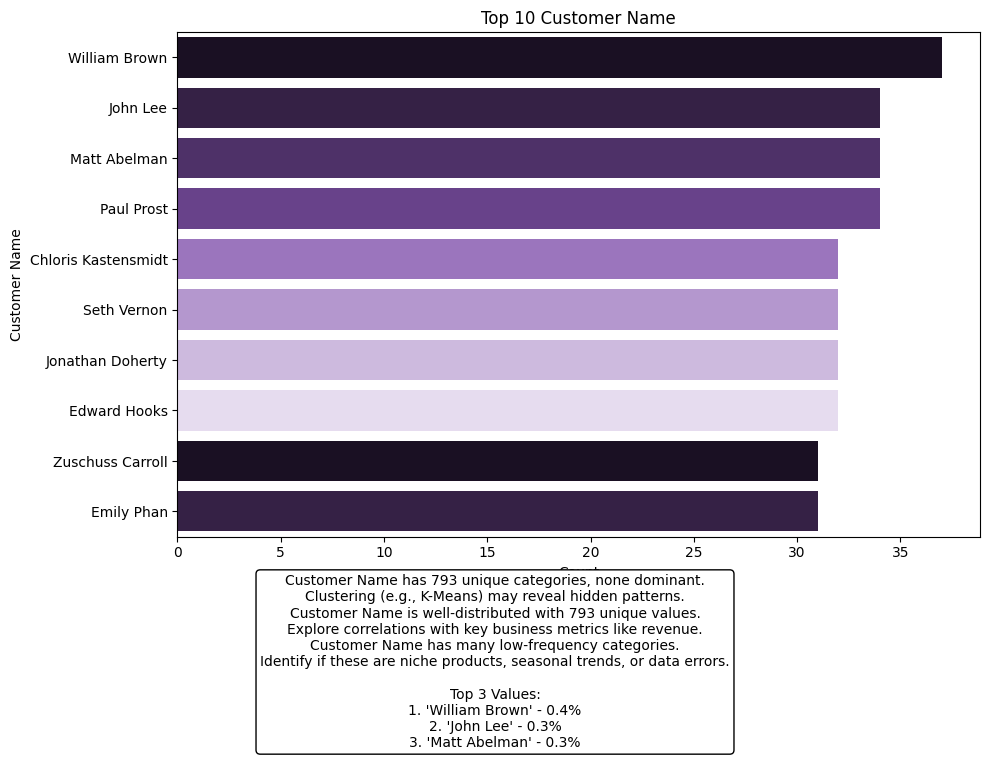

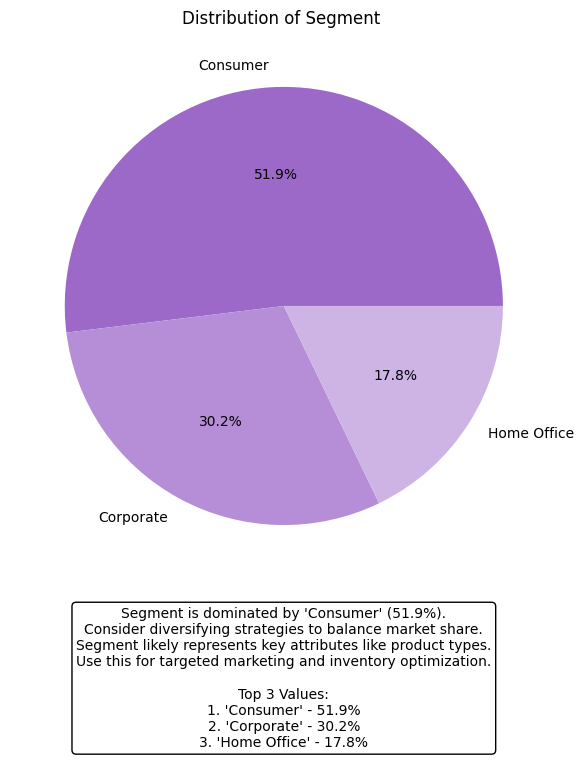

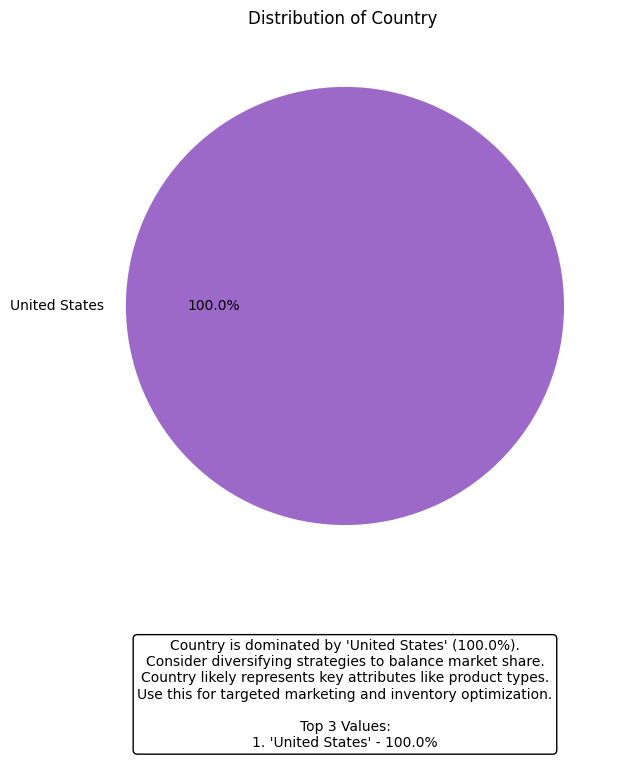

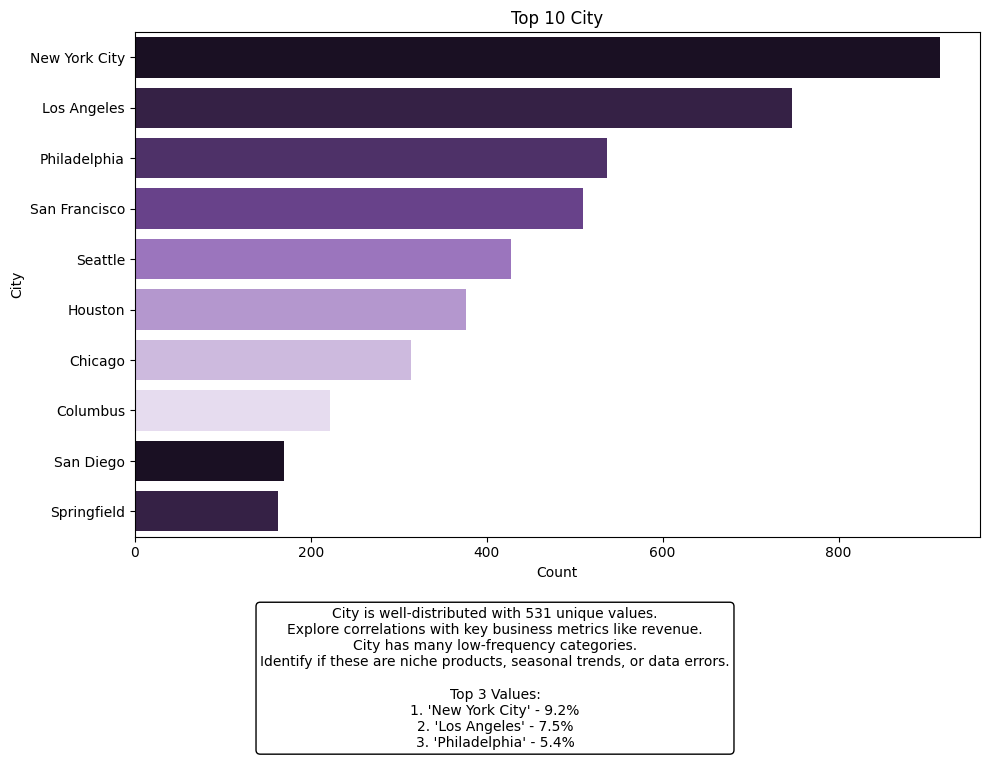

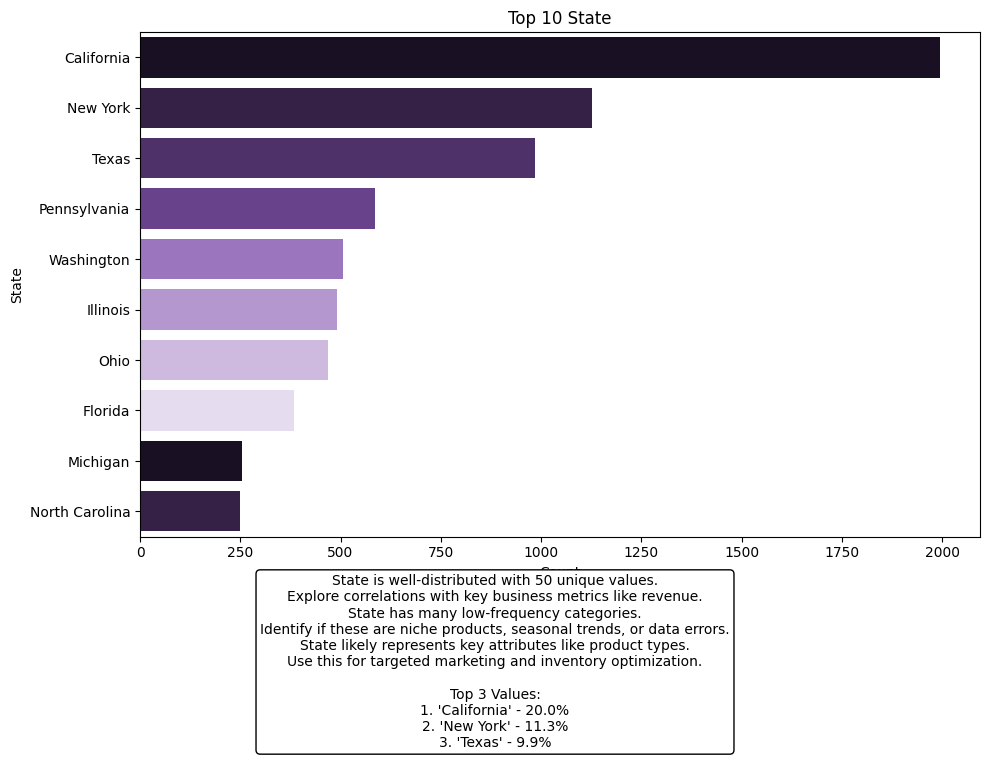

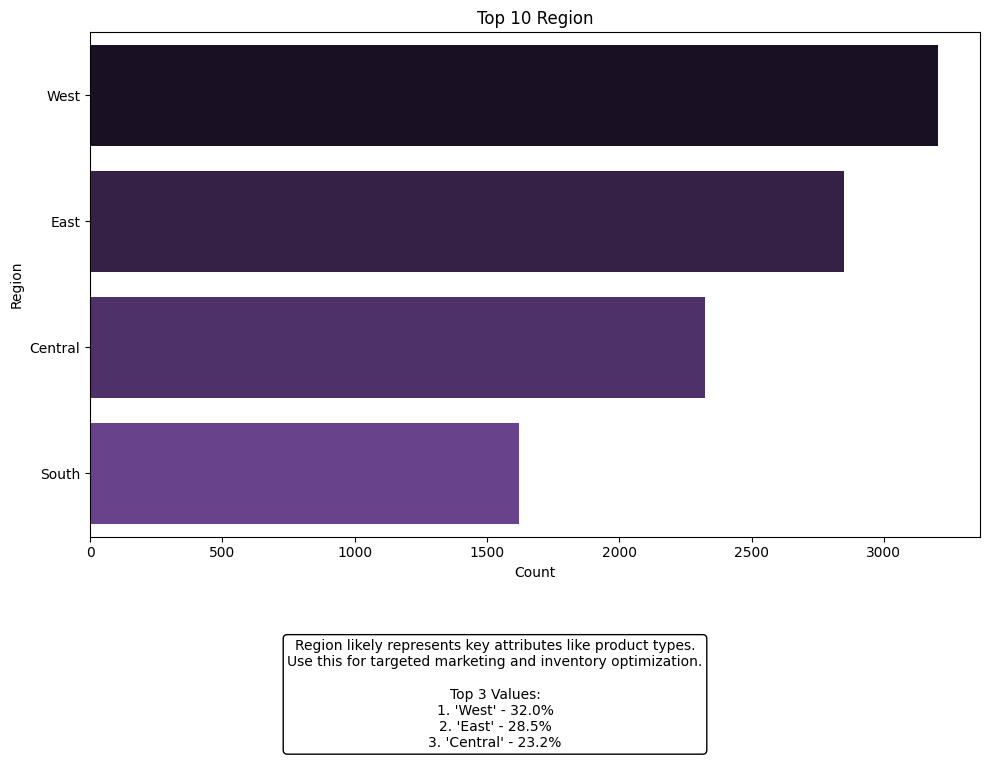

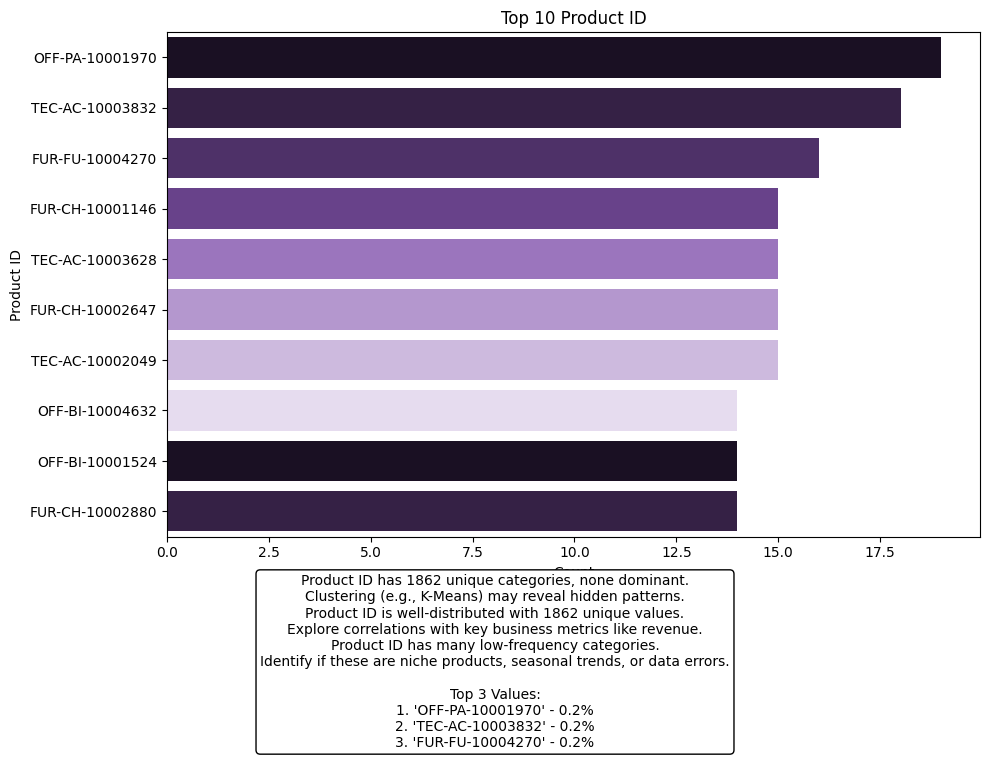

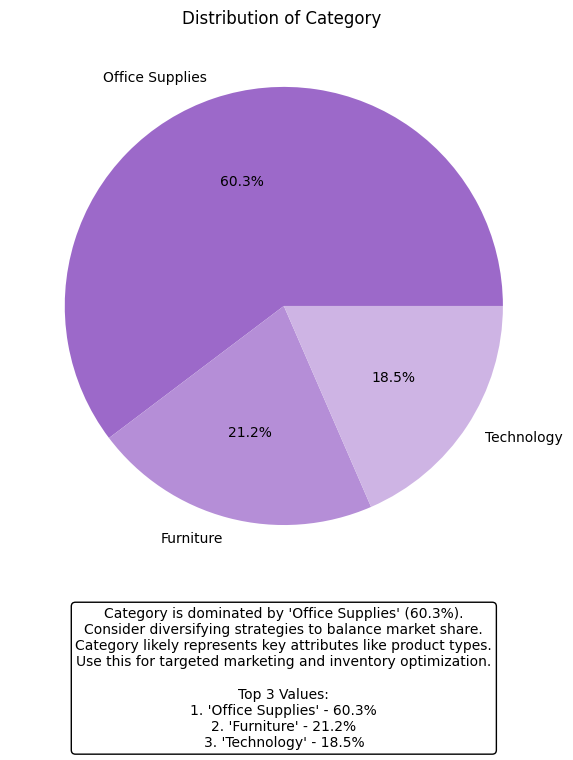

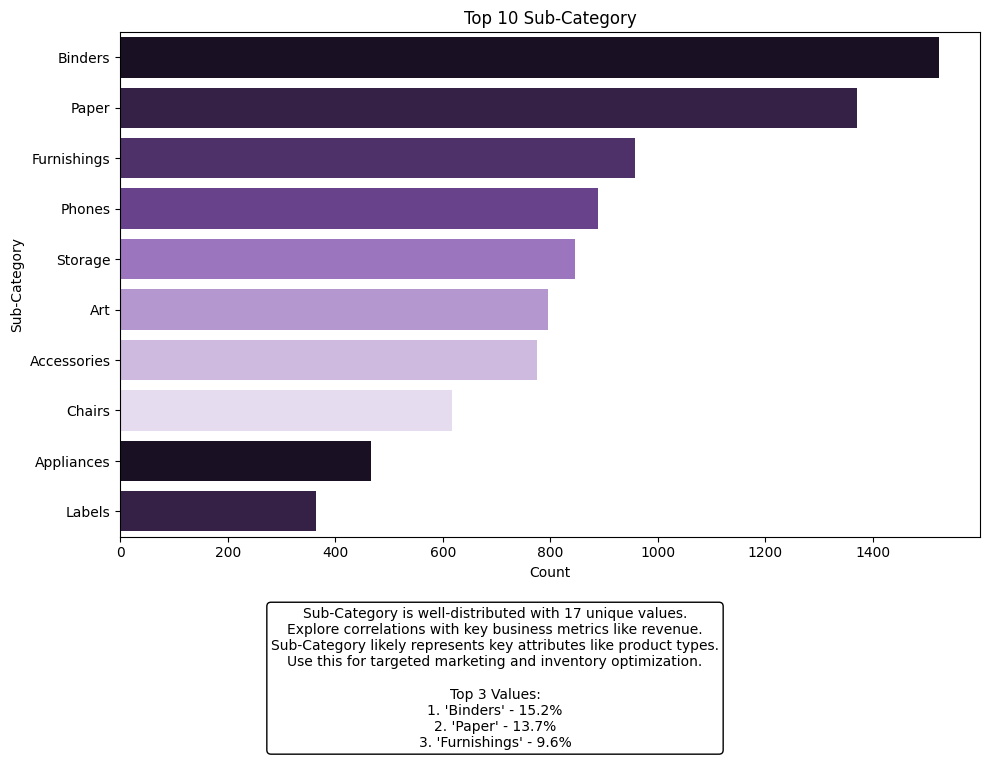

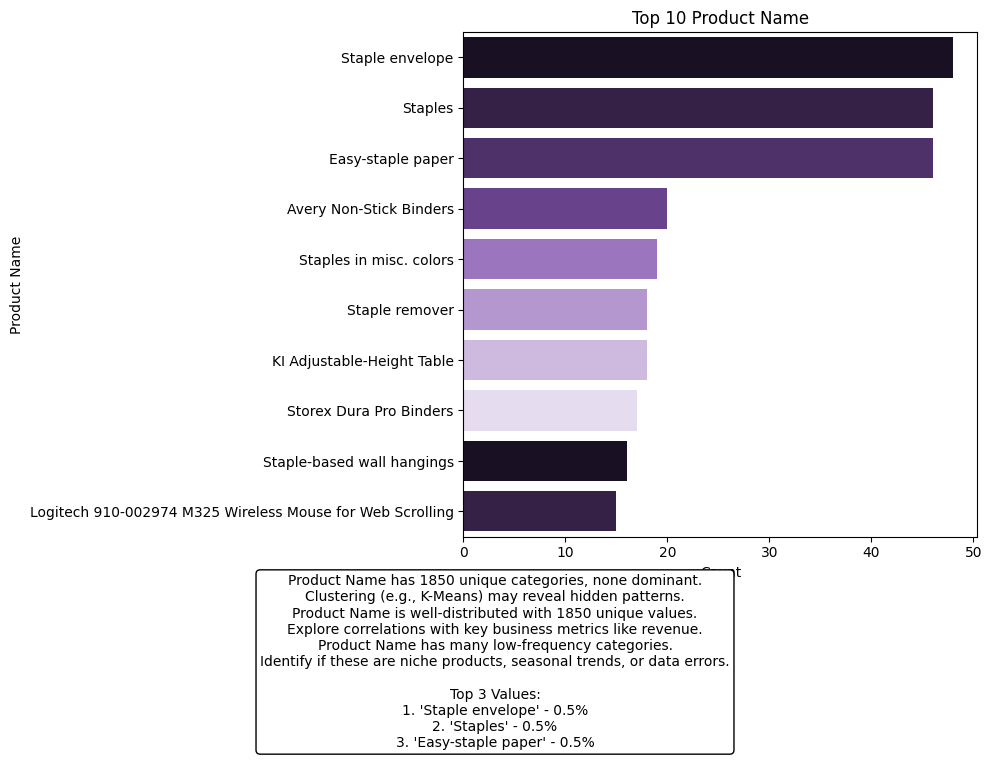

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palettes
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
LIGHT_COLORS = ["#9C69C9", "#B58ED7", "#CEB4E4", "#E6D9F2"]

def is_likely_id_column(df, column):
    """Identifies if a column is likely an ID based on unique values ratio."""
    unique_ratio = df[column].nunique() / len(df)
    return unique_ratio > 0.5  # ID-like columns have high uniqueness

def generate_dynamic_categorical_insights(df, column):
    """Generates dynamic insights based on categorical distribution, including top 3 values."""
    category_counts = df[column].value_counts(normalize=True)
    total_values = len(df)
    unique_values = df[column].nunique()

    top_category = category_counts.idxmax()
    top_category_percentage = category_counts.max()

    insights = []

    if top_category_percentage > 0.5:
        insights.append(f"{column} is dominated by '{top_category}' ({top_category_percentage:.1%}).\n"
                        f"Consider diversifying strategies to balance market share.")

    if unique_values > 50 and top_category_percentage < 0.05:
        insights.append(f"{column} has {unique_values} unique categories, none dominant.\n"
                        f"Clustering (e.g., K-Means) may reveal hidden patterns.")

    if unique_values > 5 and top_category_percentage < 0.3:
        insights.append(f"{column} is well-distributed with {unique_values} unique values.\n"
                        f"Explore correlations with key business metrics like revenue.")

    if (category_counts < 0.01).sum() > unique_values * 0.5:
        insights.append(f"{column} has many low-frequency categories.\n"
                        f"Identify if these are niche products, seasonal trends, or data errors.")

    if unique_values < total_values * 0.05:
        insights.append(f"{column} likely represents key attributes like product types.\n"
                        f"Use this for targeted marketing and inventory optimization.")

    # Add the top 3 values and their percentages
    top_3_values = category_counts.head(3)
    top_3_text = "\n".join([f"{i+1}. '{val}' - {perc:.1%}" for i, (val, perc) in enumerate(top_3_values.items())])

    return "\n".join(insights) + "\n\nTop 3 Values:\n" + top_3_text if insights else f"{column} contains meaningful business insights.\n\nTop 3 Values:\n{top_3_text}"

def plot_top_categorical_counts(df):
    """Plots categorical distributions dynamically with insights, using pie charts for <=3 unique values."""
    categorical_columns = df.select_dtypes(include=['object']).columns
    categorical_columns = [col for col in categorical_columns if not is_likely_id_column(df, col)]

    for column in categorical_columns:
        category_counts = df[column].value_counts().nlargest(10)
        unique_values = df[column].nunique()

        plt.figure(figsize=(10, 6))

        if unique_values <= 3:  # Use pie chart for 3 or fewer categories
            plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=LIGHT_COLORS)
            plt.title(f"Distribution of {column} ")
        else:  # Use bar chart otherwise
            sns.barplot(y=category_counts.index, x=category_counts.values, palette=DARK_COLORS + LIGHT_COLORS)
            plt.xlabel("Count")
            plt.ylabel(column)
            plt.title(f"Top 10 {column}")

        # Display dynamic insights inside the plot
        insight_text = generate_dynamic_categorical_insights(df, column)
        plt.figtext(0.5, -0.25, insight_text, wrap=True, horizontalalignment='center', fontsize=10,
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        plt.tight_layout()
        plt.show()


plot_top_categorical_counts(df_cleaned)

# **Numerical graphs**

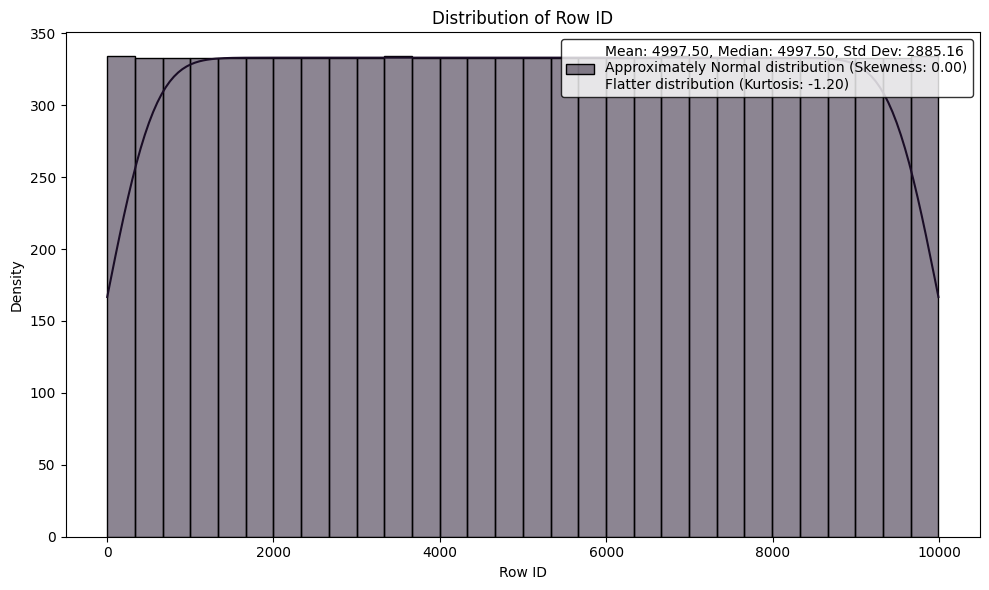

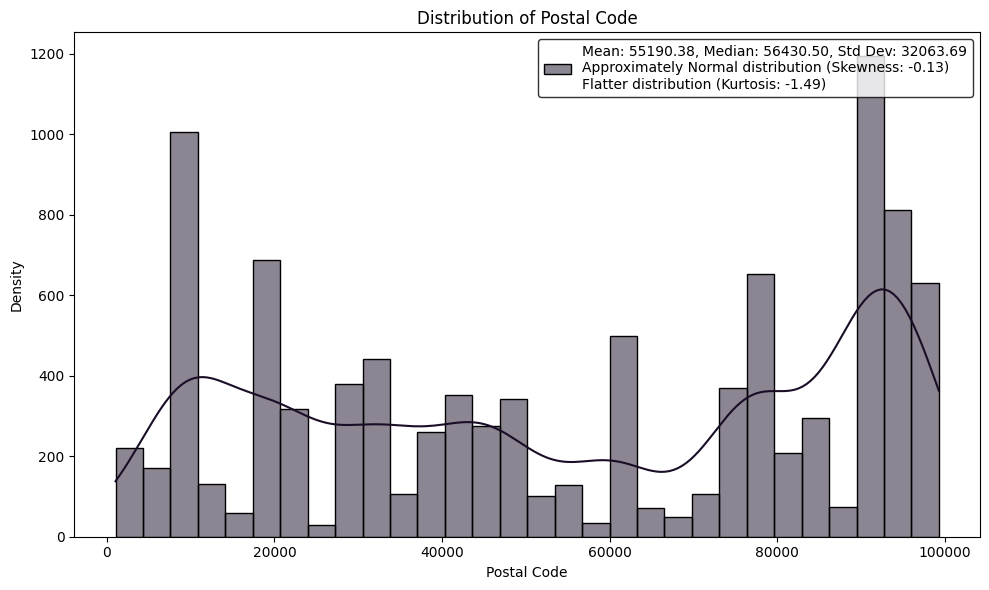

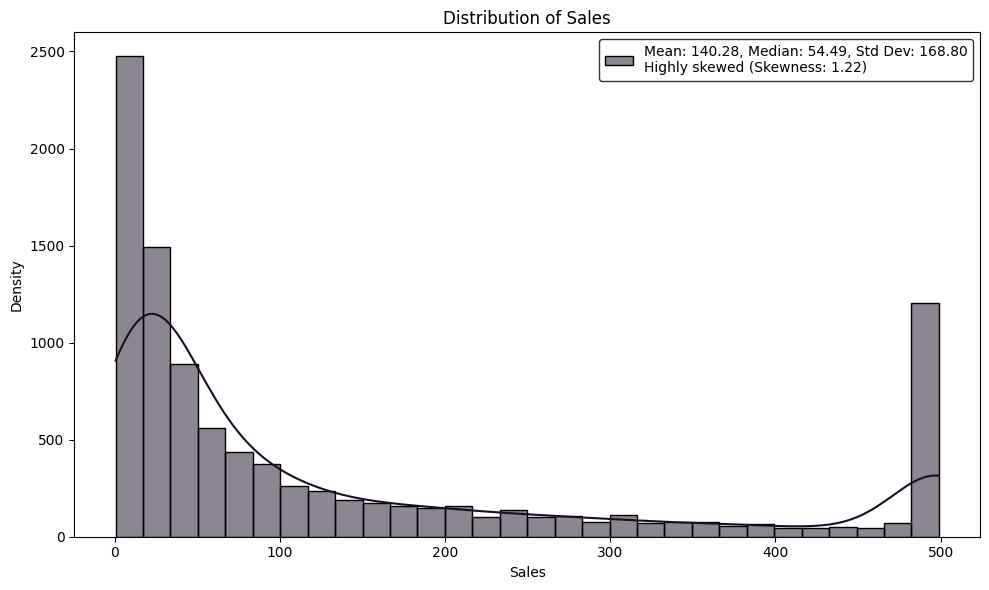

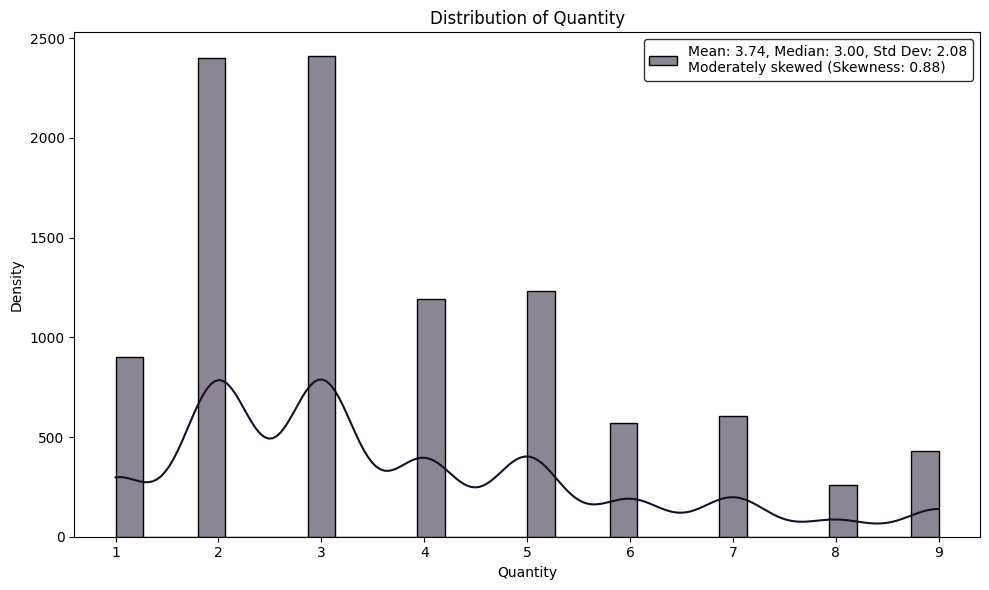

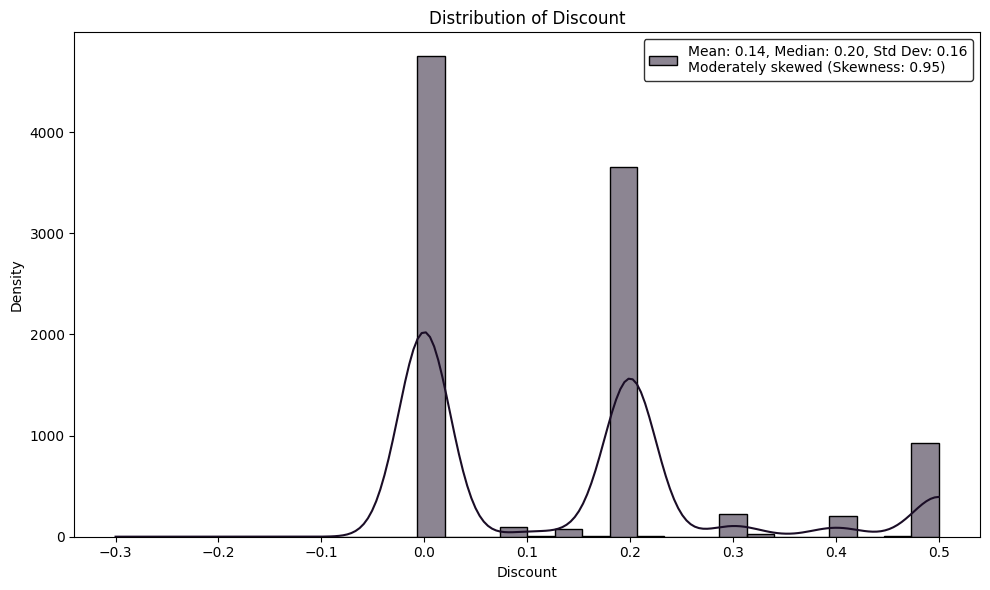

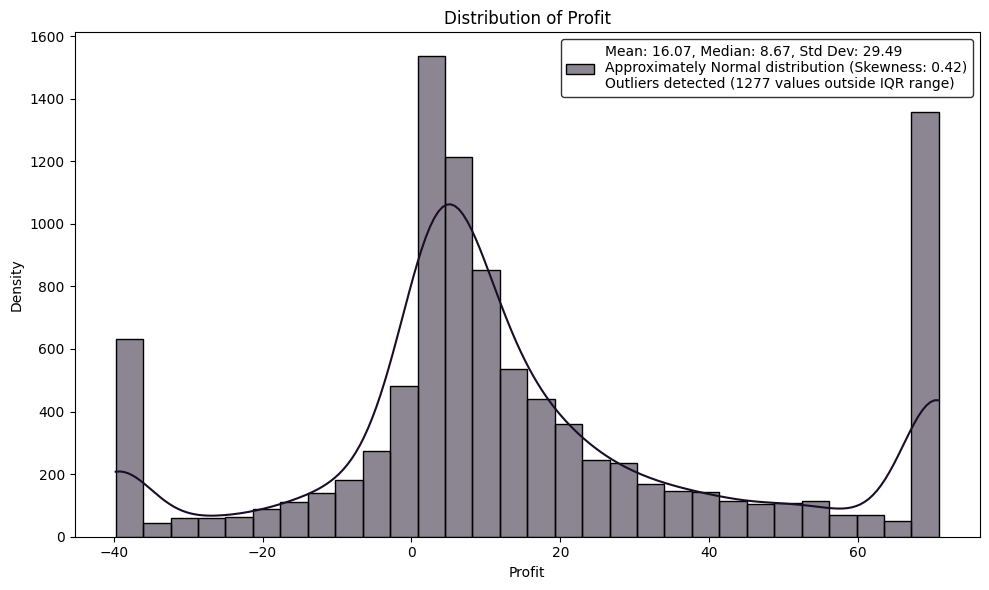

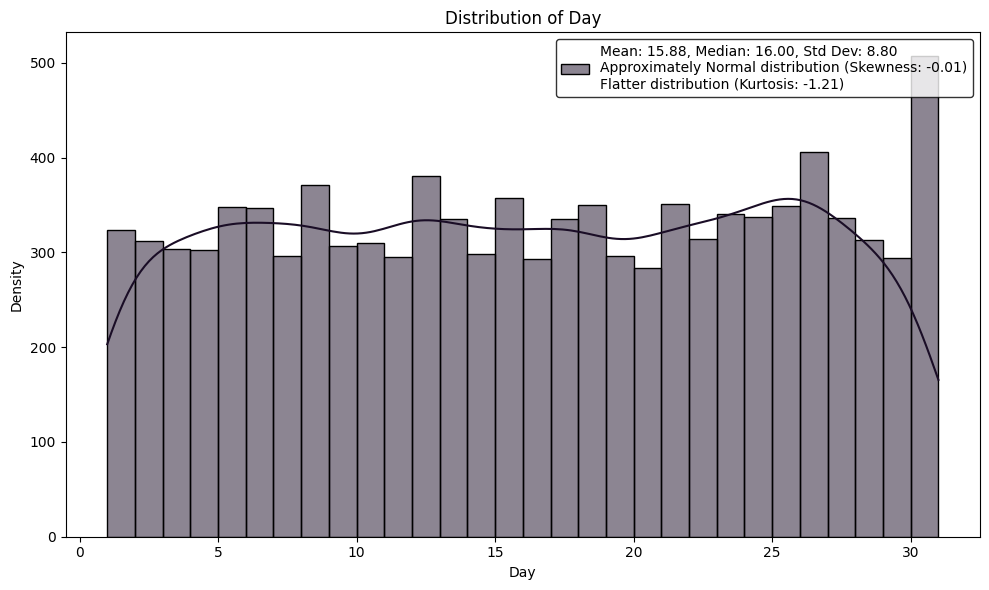

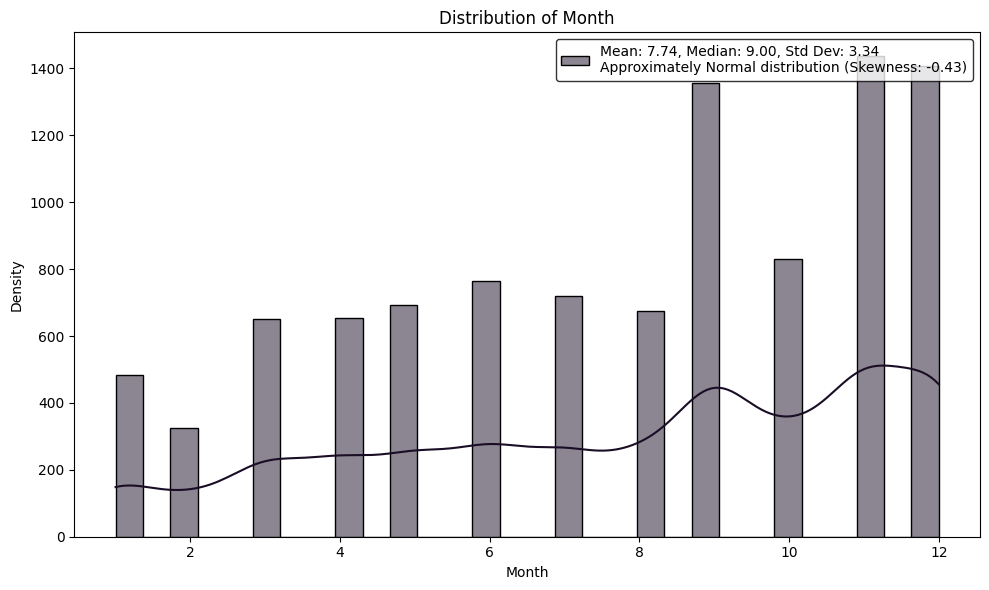

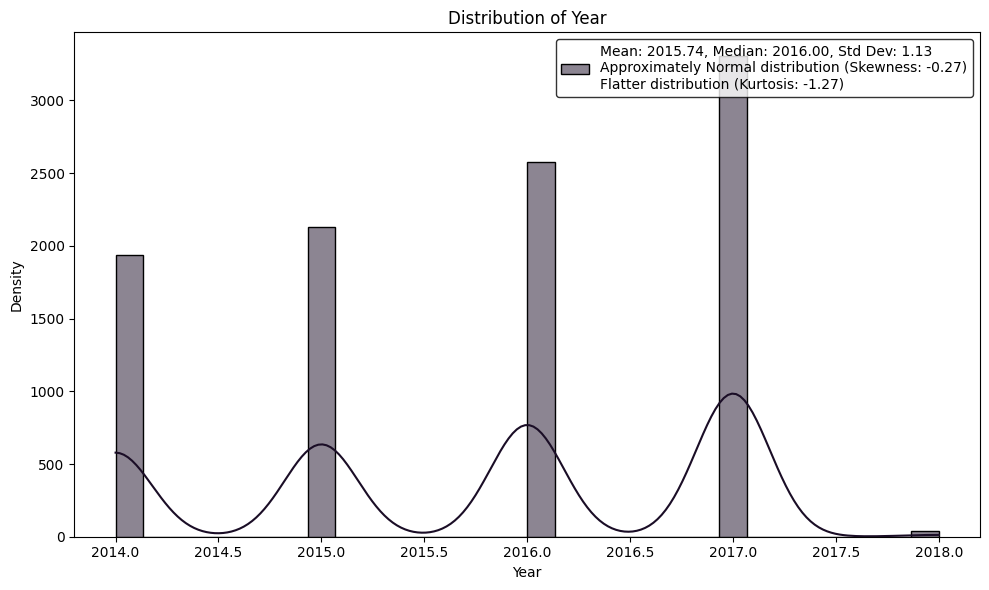

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palettes
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
LIGHT_COLORS = ["#9C69C9", "#B58ED7", "#CEB4E4", "#E6D9F2"]

def generate_numerical_insights(df, column):
    """Generates insights based on numerical distributions, skewness, and outliers."""
    insights = []
    mean_val = df[column].mean()
    median_val = df[column].median()
    std_dev = df[column].std()
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()

    insights.append(f"Mean: {mean_val:.2f}, Median: {median_val:.2f}, Std Dev: {std_dev:.2f}")

    if abs(skewness) > 1:
        insights.append(f"Highly skewed (Skewness: {skewness:.2f})")
    elif abs(skewness) > 0.5:
        insights.append(f"Moderately skewed (Skewness: {skewness:.2f})")
    else:
        insights.append(f"Approximately Normal distribution (Skewness: {skewness:.2f})")

    if kurtosis > 3:
        insights.append(f"High peak and heavy tails (Kurtosis: {kurtosis:.2f})")
    elif kurtosis < -1:
        insights.append(f"Flatter distribution (Kurtosis: {kurtosis:.2f})")

    q1, q3 = df[column].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    if not outliers.empty:
        insights.append(f"Outliers detected ({len(outliers)} values outside IQR range)")

    return "\n".join(insights)

def plot_numerical_distributions(df):
    """Plots numerical distributions dynamically with insights."""
    numerical_columns = df.select_dtypes(include=['number']).columns

    for column in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True, color=DARK_COLORS[0], bins=30, label=generate_numerical_insights(df, column))
        plt.xlabel(column)
        plt.ylabel("Density")
        plt.title(f"Distribution of {column}")
        plt.legend(loc='upper right', fontsize=10, frameon=True, edgecolor='black')

        plt.tight_layout()
        plt.show()

plot_numerical_distributions(df_cleaned)


# **Exploratory Data analysis**

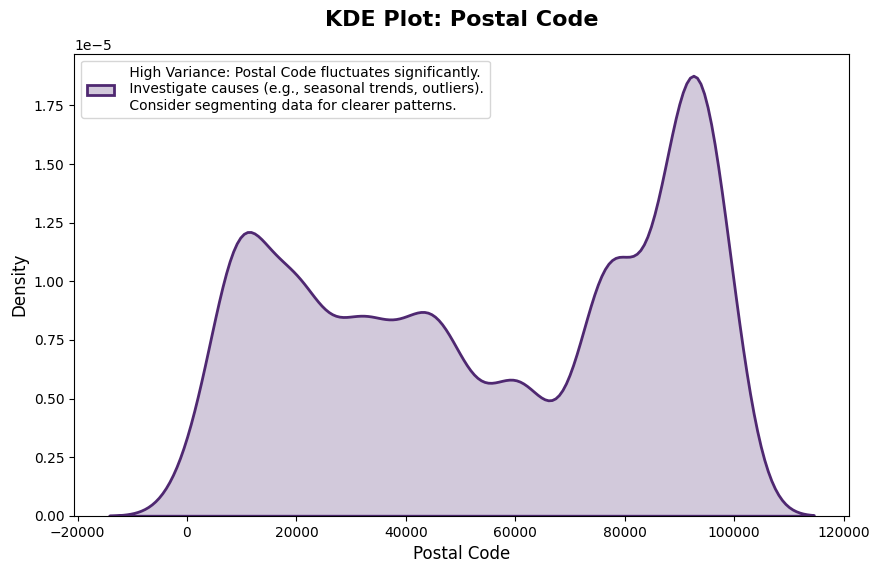

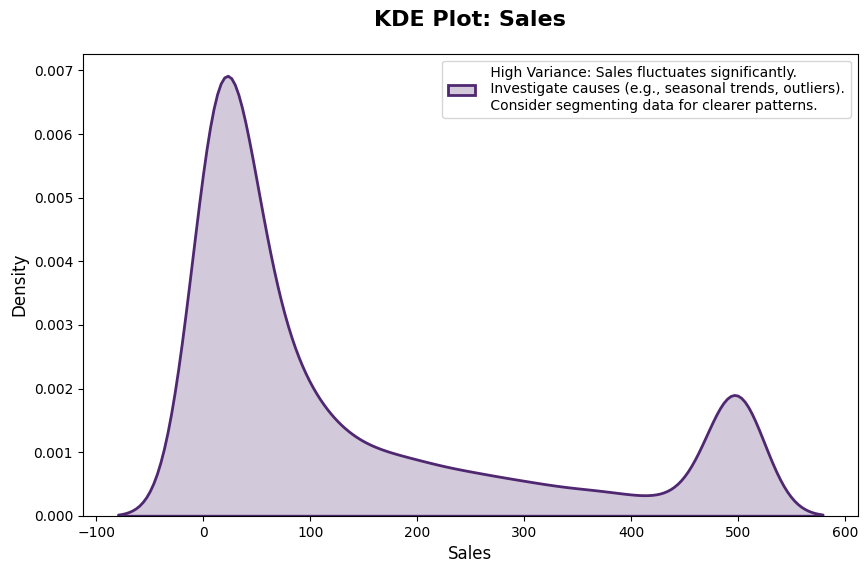

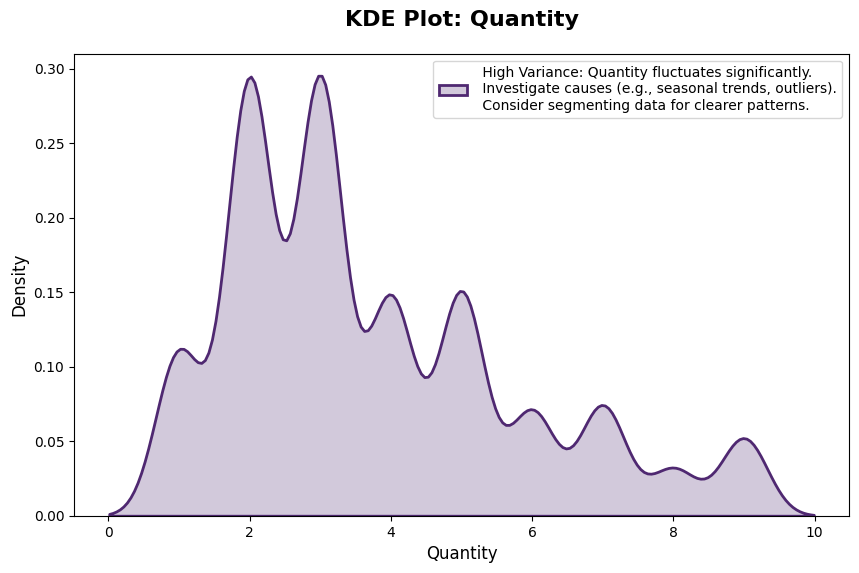

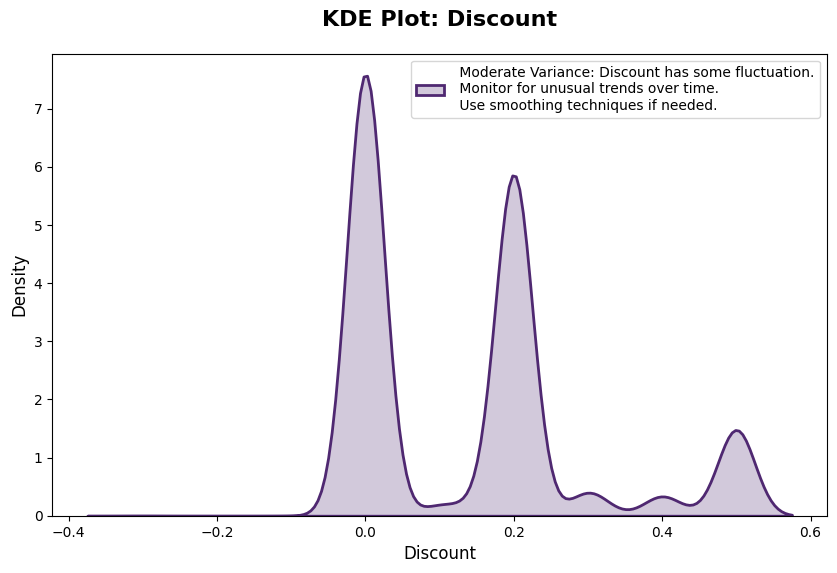

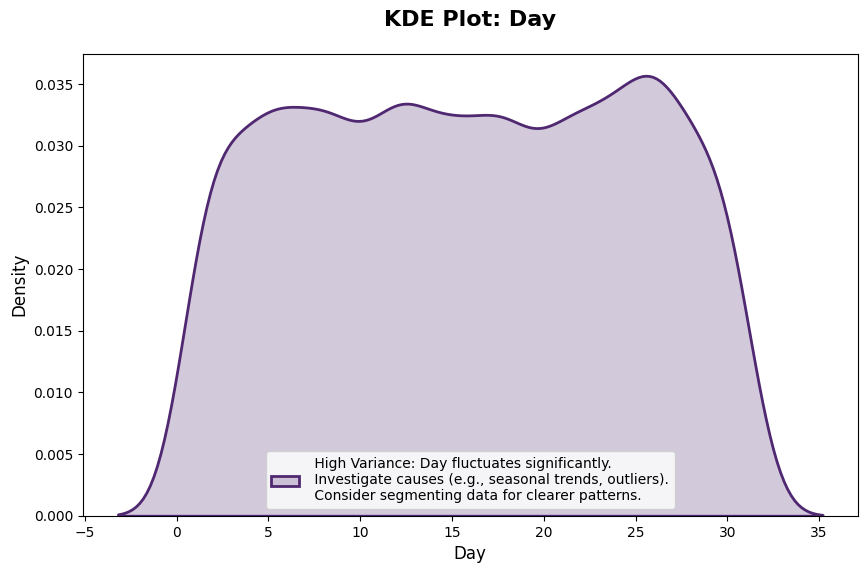

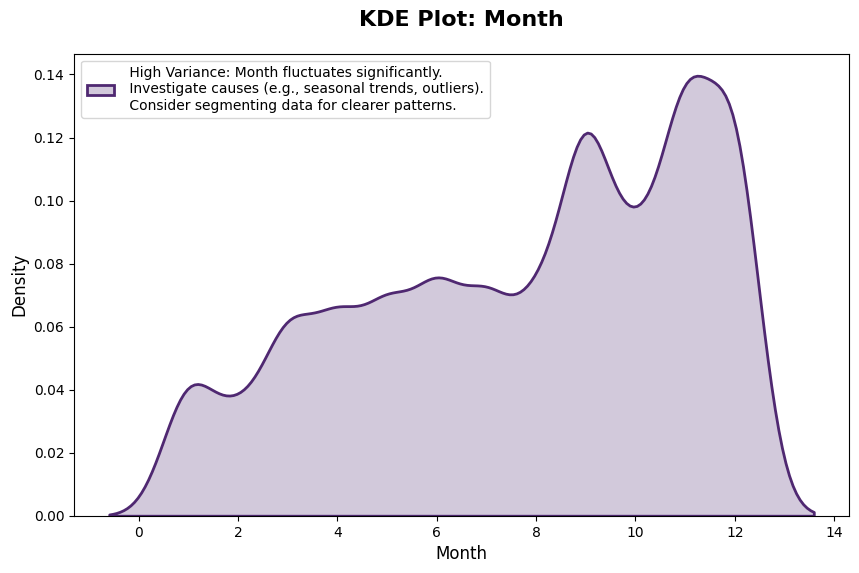

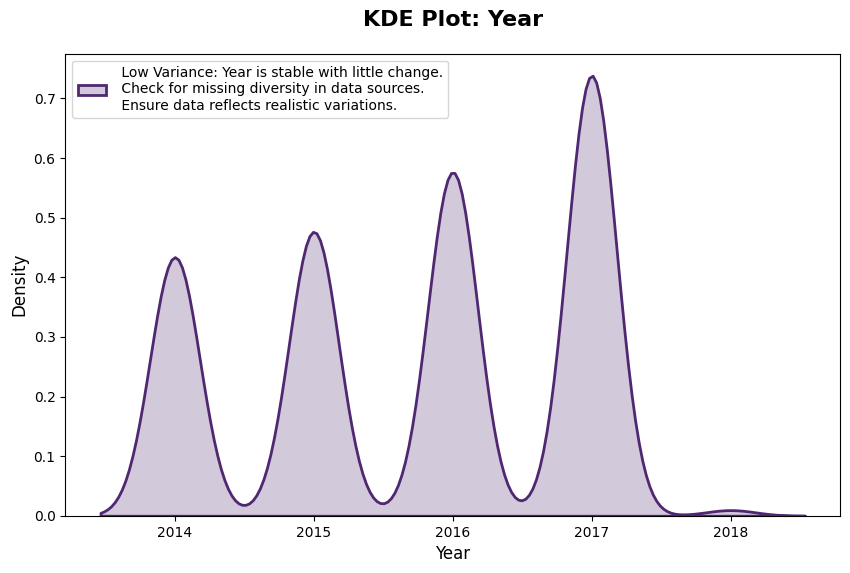

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define color themes
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
LIGHT_COLORS = ["#9C69C9", "#B58ED7", "#CEB4E4", "#E6D9F2"]

def is_id_column(df, col_name):
    """
    Detects ID-like columns dynamically based on uniqueness.
    If more than 50% of values are unique, the column is likely an identifier.
    """
    return df[col_name].nunique() > (0.5 * len(df))

def plot_kde_with_insights(df):
    """
    Generates Kernel Density Estimation (KDE) plots for numerical columns,
    filters out ID-like columns, analyzes variance, and annotates insights using a legend.
    """
    numerical_cols = [col for col in df.select_dtypes(include=[np.number]).columns if not is_id_column(df, col)]

    if not numerical_cols:
        print("No suitable numerical columns found for KDE plotting.")
        return

    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(df[col], shade=True, color=DARK_COLORS[2], linewidth=2, label=f"Distribution of {col}")

        # Calculate variance and standard deviation
        variance = np.var(df[col])
        std_dev = np.std(df[col])

        # Define variance categories dynamically based on column mean
        mean_value = df[col].mean()
        low_threshold = mean_value * 0.05
        high_threshold = mean_value * 0.5

        # Interpret variance levels
        if variance > high_threshold:
            insight = f"High Variance: {col} fluctuates significantly."
            recommendation = f"Investigate causes (e.g., seasonal trends, outliers)."
            action = f"Consider segmenting data for clearer patterns."
        elif variance < low_threshold:
            insight = f"Low Variance: {col} is stable with little change."
            recommendation = f"Check for missing diversity in data sources."
            action = f"Ensure data reflects realistic variations."
        else:
            insight = f"Moderate Variance: {col} has some fluctuation."
            recommendation = f"Monitor for unusual trends over time."
            action = f"Use smoothing techniques if needed."

        # Plot formatting
        plt.title(f"KDE Plot: {col}", fontsize=16, fontweight='bold', pad=20)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Density", fontsize=12)

        # Add insights as a legend instead of overlapping text
        plt.legend([f" {insight}\n {recommendation}\n {action}"], loc="best", fontsize=10, frameon=True)

        plt.show()

# Example Usage
plot_kde_with_insights(df_cleaned)


# **Report**

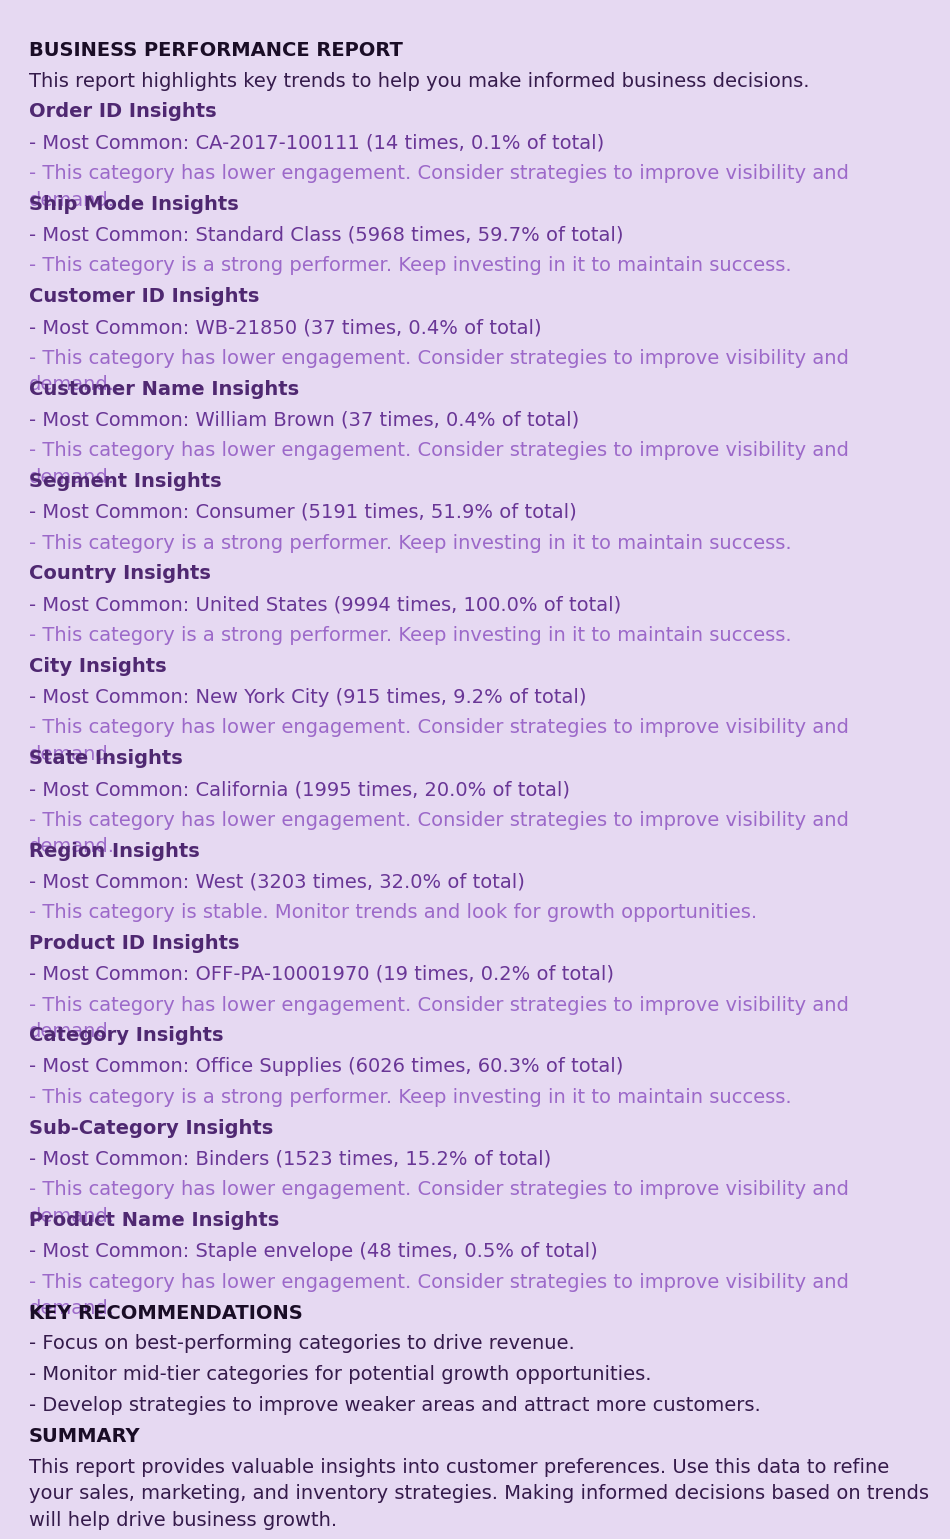

In [56]:
import matplotlib.pyplot as plt
from textwrap import wrap

# Define color palettes
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
LIGHT_COLORS = ["#9C69C9", "#B58ED7", "#CEB4E4", "#E6D9F2"]


def generate_summary_report_image(df):

    categorical_columns = df.select_dtypes(include=['object']).columns
    insights = []

    # Title Section
    insights.append(("BUSINESS PERFORMANCE REPORT\n", DARK_COLORS[0], "bold"))
    insights.append(("This report highlights key trends to help you make informed business decisions.\n\n\n\n", DARK_COLORS[1], "regular"))

    # Generate insights for each categorical column
    for column in categorical_columns:
        value_counts = df[column].value_counts()
        top_value = value_counts.idxmax()
        count = value_counts.max()
        total = len(df)
        percentage = (count / total) * 100

        # Define color coding based on percentage
        if percentage > 50:
            color = LIGHT_COLORS[0]  # Most popular category
            action = "This category is a strong performer. Keep investing in it to maintain success.\n"
        elif percentage > 20:
            color = LIGHT_COLORS[0]  # Moderate category
            action = "This category is stable. Monitor trends and look for growth opportunities.\n"
        else:
            color = LIGHT_COLORS[0]  # Low-performing category
            action = "This category has lower engagement. Consider strategies to improve visibility and demand.\n"

        # Generate formatted insight
        insights.append((f"{column} Insights", DARK_COLORS[2], "bold"))
        insights.append((f"- Most Common: {top_value} ({count} times, {percentage:.1f}% of total)", DARK_COLORS[3], "regular"))
        insights.append((f"- {action}\n", color, "regular"))

    # Key Recommendations
    insights.append(("KEY RECOMMENDATIONS\n", DARK_COLORS[0], "bold"))
    insights.append(("- Focus on best-performing categories to drive revenue.", DARK_COLORS[1], "regular"))
    insights.append(("- Monitor mid-tier categories for potential growth opportunities.", DARK_COLORS[1], "regular"))
    insights.append(("- Develop strategies to improve weaker areas and attract more customers.\n", DARK_COLORS[1], "regular"))

    # Summary Section
    insights.append(("SUMMARY\n", DARK_COLORS[0], "bold"))
    insights.append(("This report provides valuable insights into customer preferences. Use this data to refine your sales, marketing, and inventory strategies. Making informed decisions based on trends will help drive business growth.", DARK_COLORS[1], "regular"))

    # Create figure with a light background
    fig, ax = plt.subplots(figsize=(12, 8), dpi=100, facecolor=LIGHT_COLORS[3])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    # Display text inside the figure with different colors and font weights
    y_position = 0.95
    for text, color, weight in insights:
        wrapped_text = "\n".join(wrap(text, width=90))
        ax.text(
            0.02, y_position, wrapped_text,
            fontsize=14,
            va="top", ha="left",
            family="Times New Roman",
            fontweight=weight,  # Use bold or regular
            linespacing=1.5,
            color=color
        )
        y_position -= 0.05  # Adjust spacing

    # Show the report image
    plt.show()


# Run the improved report
generate_summary_report_image(df_cleaned)

# **Correlation**

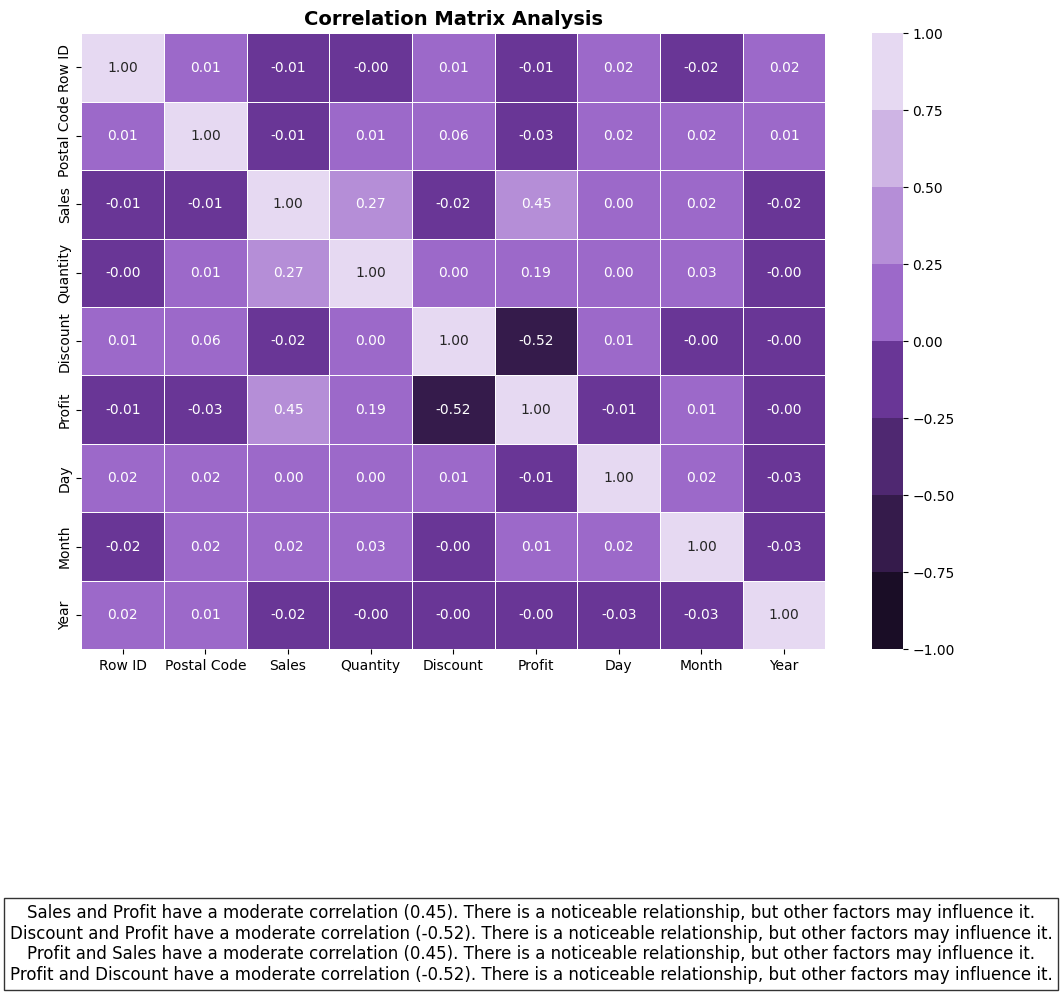

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
LIGHT_COLORS = ["#9C69C9", "#B58ED7", "#CEB4E4", "#E6D9F2"]

def plot_correlation_matrix(df):
    """
    Plots a correlation matrix with business insights below the graph.
    """
    # Select only numerical columns
    numerical_df = df.select_dtypes(include=[np.number])

    # Compute correlation matrix
    corr_matrix = numerical_df.corr()

    # Define color mapping based on correlation strength
    cmap = sns.color_palette(DARK_COLORS + LIGHT_COLORS, as_cmap=True)

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
    plt.title("Correlation Matrix Analysis", fontsize=14, fontweight='bold')

    # Generate Business Insights
    insights = []
    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.columns:
            if col1 != col2:
                corr_value = corr_matrix.loc[col1, col2]
                if corr_value > 0.7:
                    insights.append(f"{col1} and {col2} have a strong positive correlation ({corr_value:.2f}). This suggests that increasing {col1} will likely increase {col2}.")
                elif corr_value < -0.7:
                    insights.append(f"{col1} and {col2} have a strong negative correlation ({corr_value:.2f}). This means when {col1} increases, {col2} tends to decrease.")
                elif 0.3 < corr_value < 0.7 or -0.7 < corr_value < -0.3:
                    insights.append(f"{col1} and {col2} have a moderate correlation ({corr_value:.2f}). There is a noticeable relationship, but other factors may influence it.")

    # Display Insights Below the Graph
    insight_text = "\n".join(insights)
    plt.figtext(0.5, -0.3, insight_text, wrap=True, horizontalalignment='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    plt.show()

# Example Usage:
plot_correlation_matrix(df_cleaned)


# **Predictive data analysis**

In [58]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

def forecast_business_metrics(df):
    # Keywords to identify relevant columns
    keywords = [
        "sales", "profit", "revenue", "income", "return", "proceeds", "earnings",
        "yield", "incoming", "gain", "transactions", "deals", "purchases",
        "auctions", "bargains", "trades", "buys", "negotiations"
    ]

    # Identify columns dynamically
    target_cols = [col for col in df.columns if any(keyword in col.lower() for keyword in keywords)]

    if not target_cols:
        print("No relevant financial columns found. Forecasting is skipped.")
        return

    # Create a Date column from Year, Month, Day
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

    # Aggregate data monthly
    df = df.groupby(pd.Grouper(key='Date', freq='M'))[target_cols].sum().reset_index()

    for col in target_cols:
        plt.figure(figsize=(12, 6))  # Separate figure for each metric

        # Prepare data for Prophet
        data = df[['Date', col]].rename(columns={'Date': 'ds', col: 'y'})

        # Fit the Prophet model
        model = Prophet()
        model.fit(data)

        # Create future dates
        future = model.make_future_dataframe(periods=12, freq='M')
        forecast = model.predict(future)

        # Calculate forecast accuracy
        actual_values = data['y'].values
        predicted_values = model.predict(data)['yhat'].values
        mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100
        accuracy = 100 - mape  # Accuracy is 100 - MAPE

        # Plot results
        plt.plot(data['ds'], data['y'], label=f"Historical {col}", color="#B58ED7")
        plt.plot(forecast['ds'], forecast['yhat'], label=f"Forecast {col} (Accuracy: {accuracy:.2f}%)", color="#693696" , linestyle= 'dotted')

        plt.title(f"{col} Forecast")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.legend(loc="best")
        plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6t_1c1s3/a0x_uzyu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6t_1c1s3/rzrcou_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5442', 'data', 'file=/tmp/tmp6t_1c1s3/a0x_uzyu.json', 'init=/tmp/tmp6t_1c1s3/rzrcou_f.json', 'output', 'file=/tmp/tmp6t_1c1s3/prophet_modellsx7o2ri/prophet_model-20250311041737.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:17:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:17:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


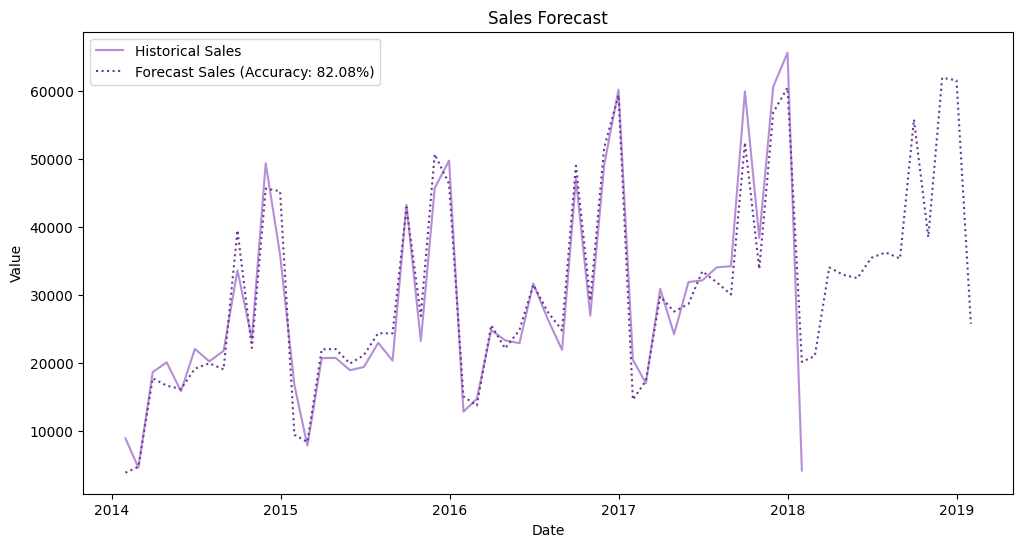

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6t_1c1s3/d6i0tb_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6t_1c1s3/ywljtvms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33858', 'data', 'file=/tmp/tmp6t_1c1s3/d6i0tb_x.json', 'init=/tmp/tmp6t_1c1s3/ywljtvms.json', 'output', 'file=/tmp/tmp6t_1c1s3/prophet_modelf3svk2md/prophet_model-20250311041738.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:17:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


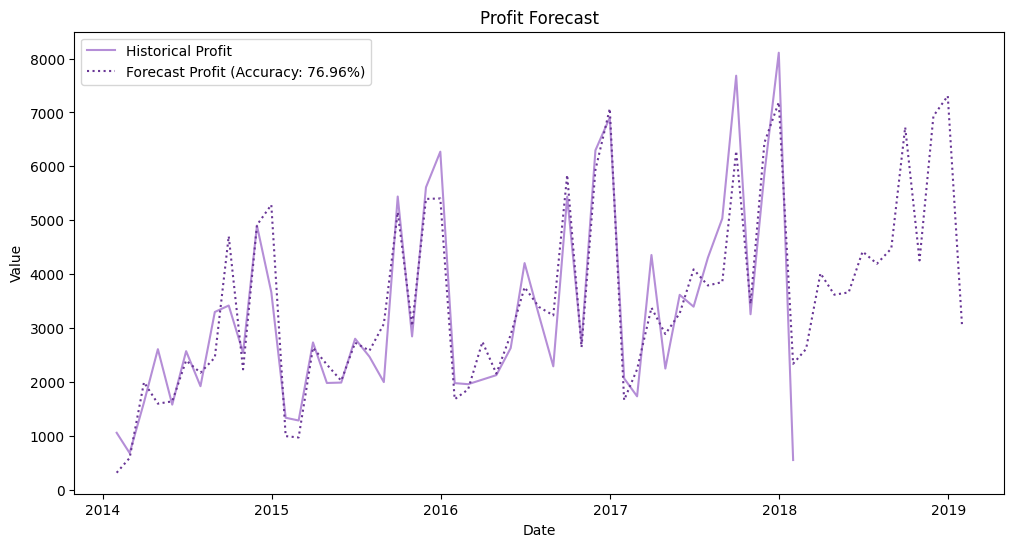

In [60]:
forecast_business_metrics(df_cleaned)